# Prerequisite


- Download Tesseract [here](https://github.com/UB-Mannheim/tesseract/wiki)


In [1]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 13 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,754 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [2]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=d7e28b7d269ac354af097faec2dfcc18fbb5ae73ddc7339323122dec2e34d5fd
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [3]:
# WebCam photo capture snippet from Google Colab Snippets
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# Hands-on

In [5]:
# Load sample images
!wget https://github.com/AlvinChiew/MachineLearning/raw/main/raw_data/ocr/G_Tesseract_OCR.png
!wget https://github.com/AlvinChiew/MachineLearning/raw/main/raw_data/ocr/HandWriting_LionCat.png
!wget https://github.com/AlvinChiew/MachineLearning/raw/main/raw_data/ocr/noisy_image_1.png
!wget https://github.com/AlvinChiew/MachineLearning/raw/main/raw_data/ocr/noisy_image_2.png
!wget https://github.com/AlvinChiew/MachineLearning/raw/main/raw_data/ocr/noisy_image_3.png
!wget https://github.com/AlvinChiew/MachineLearning/raw/main/raw_data/ocr/paragraphs.png
!wget https://github.com/AlvinChiew/MachineLearning/raw/main/raw_data/ocr/paragraphs_2.png
!wget https://github.com/AlvinChiew/MachineLearning/raw/main/raw_data/ocr/views_big.png
!wget https://github.com/AlvinChiew/MachineLearning/raw/main/raw_data/ocr/views_small.png
!wget https://github.com/AlvinChiew/MachineLearning/raw/main/raw_data/ocr/photo_example.jpg
!wget https://github.com/AlvinChiew/MachineLearning/raw/main/raw_data/ocr/invoice.jpg


--2021-01-30 19:34:54--  https://github.com/AlvinChiew/MachineLearning/raw/main/raw_data/ocr/G_Tesseract_OCR.png
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AlvinChiew/MachineLearning/main/raw_data/ocr/G_Tesseract_OCR.png [following]
--2021-01-30 19:34:54--  https://raw.githubusercontent.com/AlvinChiew/MachineLearning/main/raw_data/ocr/G_Tesseract_OCR.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6178 (6.0K) [image/png]
Saving to: ‘G_Tesseract_OCR.png’

G_Tesseract_OCR.png 100%[===================>]   6.03K  --.-KB/s    in 0s      

2021-01-30 19:34:54 (89.9 MB/s) - ‘G_Tesseract_OCR.png

In [6]:
# import pyautogui
import cv2
import pytesseract
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageOps

In [7]:
pytesseract.get_tesseract_version()

LooseVersion ('4.0.0-beta.1')

In [8]:
pytesseract.get_languages()

['osd', 'eng']

## Simple Texts

G Tesseract OCR



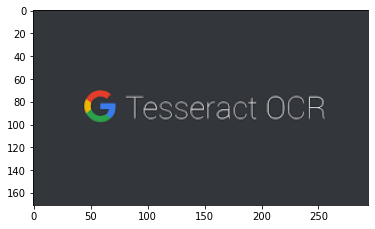

In [9]:
img_file = "G_Tesseract_OCR.png"
img = Image.open(img_file)
output = pytesseract.image_to_string(img, lang='eng')
print(output)

imgplot = plt.imshow(img)
plt.show()

## Paragraph

Here are the steps to extract text from the image in Google Colab Notebook for OCR using
Pytesseract: Step’. Install Pytesseract and tesseract-OCR in Google Colab. Step2. import
libraries. Step3. Upload Image to the Colab. Step4. Text Extraction. Step5. Detect Langauge
other than English: Step6. Get Bounding Boxes for



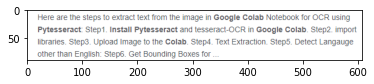

In [10]:
img_file = "paragraphs.png"
img = Image.open(img_file)
output = pytesseract.image_to_string(img, lang='eng')
print(output)

imgplot = plt.imshow(img)
plt.show()

# there is a mistake with " 1 " and " ' "

## Dark Mode

5,170 views



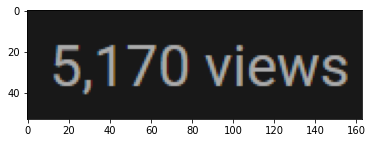

In [11]:
img_file = "views_big.png"
img = Image.open(img_file)
# img = ImageOps.invert(img)
output = pytesseract.image_to_string(img, lang='eng')
print(output)

imgplot = plt.imshow(img)
plt.show()

## Small images

In [12]:
def img_resize(img, basewidth):
    wpercent = (basewidth/float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    img = img.resize((basewidth,hsize), Image.ANTIALIAS)
    return img   

Before resize : 
After resize : 18,340 views



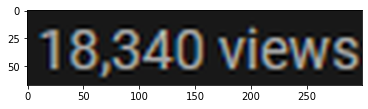

In [13]:
basewidth = 300
img_file = "views_small.png"
img = Image.open(img_file)
print(f"Before resize : {pytesseract.image_to_string(img, lang='eng')}")
img = img_resize(img, basewidth)
print(f"After resize : {pytesseract.image_to_string(img, lang='eng')}")

imgplot = plt.imshow(img)
plt.show()

## Hand-Writing with photo

This isa tion

This is a lion.

“nese are Cats

These are cats.

 



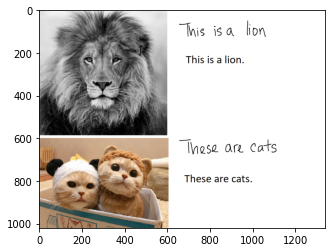

In [14]:
basewidth = 300
img_file = "HandWriting_LionCat.png"
img = Image.open(img_file)
print(pytesseract.image_to_string(img, lang='eng'))

imgplot = plt.imshow(img)
plt.show()

# length of space in handwriting is important
# "c" and "C" are confusing
# a mistake on " " " and " T "

## Noisy Images

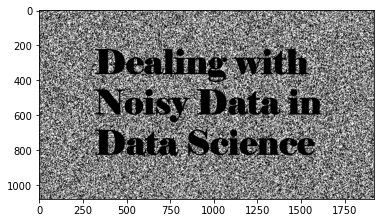

In [15]:
img_file = "noisy_image_1.png"
img = Image.open(img_file)
img = ImageOps.invert(img)
print(pytesseract.image_to_string(img, lang='eng'))

imgplot = plt.imshow(img)
plt.show()

# Failed terribly... Too much noise on the background

PL ea CEL
Noisy Data in
Data Science



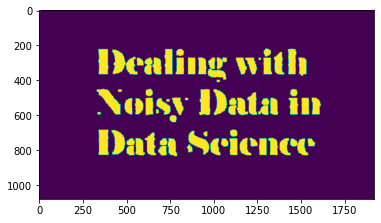

In [16]:
img_file = "noisy_image_1.png"
img = cv2.imread(img_file,0)
img = 255 - img     # convert word to black
img = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY_INV)[1]

kernel_opening = cv2.getStructuringElement(cv2.MORPH_RECT, (13,13))
# kernel_dialation = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel_opening)     # errosion then dialation 
# img = cv2.dilate(img, kernel_dialation, iterations=1)
# for color images, use blurring techniques (e.g. medianBlur/GaussianBlur)

print(pytesseract.image_to_string(img))

imgplot = plt.imshow(img)
plt.show()

# Failed terribly... Too much noise on the background

Tesseract Will
Fail With Noisy
Backgrounds



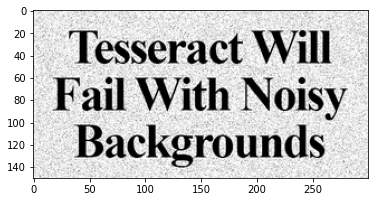

In [17]:
basewidth = 300
img_file = "noisy_image_2.png"
img = Image.open(img_file)
img = img_resize(img, basewidth)
print(pytesseract.image_to_string(img, lang='eng'))

imgplot = plt.imshow(img)
plt.show()

# Seems like texts can stil be detected when background & text are highly distinctive

Noisy,image
to test
Tesseract OCR



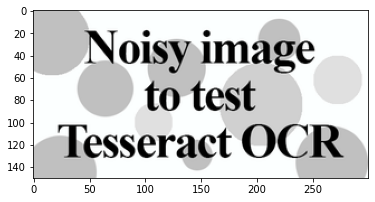

In [18]:
basewidth = 300
img_file = "noisy_image_3.png"
img = Image.open(img_file)
img = img_resize(img, basewidth)
print(pytesseract.image_to_string(img, lang='eng'))

imgplot = plt.imshow(img)
plt.show()

# text detection still functions with noise patches

 

Noise pollution is a hazardous blessing by the
human to nature and self. The high levels of
Undesirable sound in the eartivare the reason
for noise pollution. It causes ton of health
issue to people, animals, and plants too. To
forestall this, we have to know the different
reasons of Noise pollution. The noise pollution
isithe consequence of worldwide urbanization



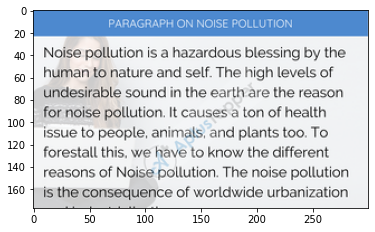

In [19]:
basewidth = 300
img_file = "paragraphs_2.png"
img = Image.open(img_file)
img = img_resize(img, basewidth)
print(pytesseract.image_to_string(img, lang='eng'))

imgplot = plt.imshow(img)
plt.show()

# text detection functions with image watermark. 

## Camera to texts

<IPython.core.display.Javascript object>

result: Pig



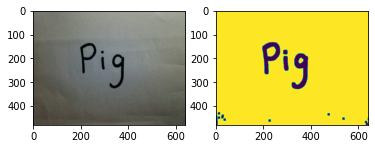

In [24]:
photo = take_photo()
img_raw = cv2.imread(photo)
img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2GRAY)
img = 255 - img
(thresh, img) = cv2.threshold(img, 228, 255, cv2.THRESH_BINARY)     # apply threshold to remove background gradient noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
img = cv2.dilate(img,kernel,iterations = 2)                         # dilate img to fill disconnection resulted from threshold
img = 255- img

print(f"result: {pytesseract.image_to_string(img, lang='eng')}")

plt.subplot(1,2,1)
plt.imshow(img_raw)
plt.subplot(1,2,2)
plt.imshow(img)

result: Happy
Coding



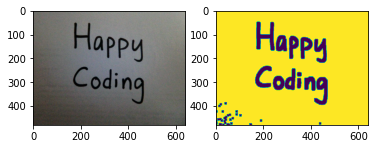

In [21]:
# Example Snapshot
img_raw = cv2.imread('photo_example.jpg')
img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2GRAY)
img = 255 - img
(thresh, img) = cv2.threshold(img, 228, 255, cv2.THRESH_BINARY)     # apply threshold to remove background gradient noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
img = cv2.dilate(img,kernel,iterations = 2)                         # dilate img to fill disconnection resulted from threshold
img = 255- img

print(f"result: {pytesseract.image_to_string(img, lang='eng')}")

plt.subplot(1,2,1)
plt.imshow(img_raw)
plt.subplot(1,2,2)
plt.imshow(img)

## Invoice Info Extraction

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


<Figure size 432x288 with 0 Axes>

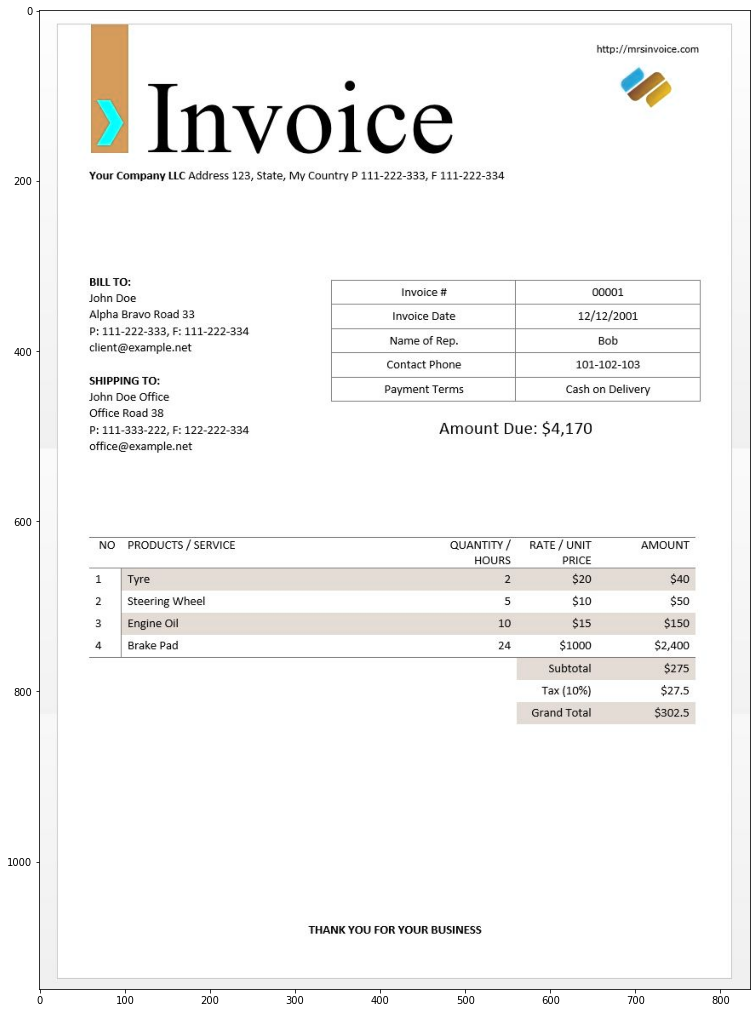

In [51]:
data = {}
plt.clf()

# convert image into data blocks
img_raw = cv2.imread('invoice.jpg')
data = pytesseract.image_to_data(img_raw, output_type=pytesseract.Output.DICT)

fig = plt.figure(figsize=(18, 18))
plt.imshow(img_raw)
print(data.keys())

['', '', '', '', ',', 'Invoice', '', '', '', 'Your', 'Company', 'LLC', 'Address', '123,', 'State,', 'My', 'Country', 'P', '111-222-333,', 'F', '111-222-334', '', '', '', 'BILL', 'TO:', '', 'John', 'Doe', '', '', 'Alpha', 'Bravo', 'Road', '33', '', '', 'P:', '111-222-338,', 'F:', '111-222-334', '', 'client@example.net', '', '', '', 'SHIPPING', 'TO:', '', 'John', 'Doe', 'Office', '', '', 'Office', 'Road', '38,', '', '', 'P:', '111-383-222,', 'F:', '122-222-834', '', 'office@example.net', '', '', '', 'http://mrsinvoice.com', '', '', '', ' ', '', '', '', ' ', '', '', '', ' ', '', '', '', ' ', '', '', '', ' ', '', '', '', 'Invoice', '#', '00001', '', 'Invoice', 'Date', '12/12/2001', '', 'Name', 'of', 'Rep.', 'Bob', '', '', 'Contact', 'Phone', '101-102-103', '', '', '', ' ', '', '', '', 'Payment', 'Terms', '', '', '', ' ', '', '', '', ' ', '', '', '', 'Cash', 'on', 'Delivery', '', '', '', ' ', '', '', '', ' ', '', '', '', 'Amount', 'Due:', '$4,170', '', '', '', ' ', '', '', '', ' ', '', '', 

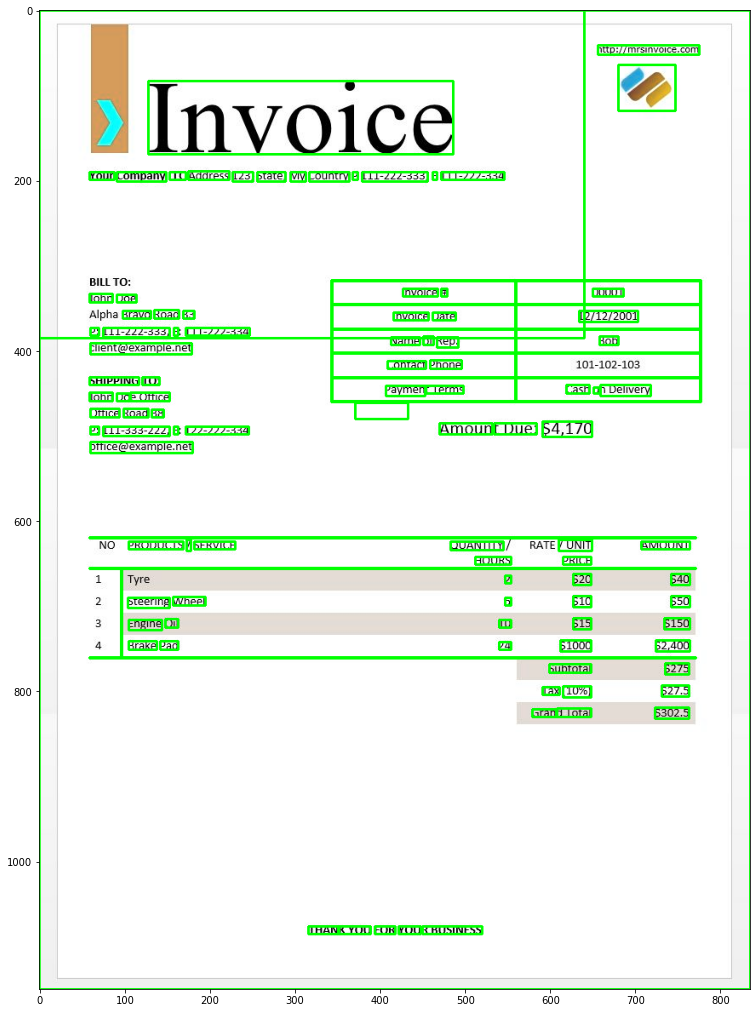

In [53]:
# show data blocks
n_boxes = len(data['text'])
for i in range(n_boxes):
    if int(data['conf'][i]) > 60:
        (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

fig = plt.figure(figsize=(18, 18))
plt.imshow(img)

# Post-processing with Regex to map invoice data.
print(data['text'])

## Detect only digits

Other possibilities: <br>
- whitelist / blacklist character(s)
- selective detection (e.g. only digits / letters)